In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [3]:
fake_data = pd.read_csv('data/Fake.csv')
true_data = pd.read_csv('data/True.csv')

# Data Analysis

In [4]:
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
true_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [6]:
fake_data['label'] = 0
true_data['label'] = 1

In [7]:
true_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1

In [8]:
dataset = pd.concat([fake_data, true_data])
dataset.tail()

title  \
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  label  
21412  August 22, 2017       1  
21413  August 22, 2017       1  
21414  August 22, 2017       1  
21415  August 22, 2017       1  
21416  August 22, 2017       1

In [9]:
dataset.shape[0] # gives number of row count
dataset.shape[1] # gives number of col count

5

# Data Visualization

In [10]:
dataset['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

In [11]:
dataset['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

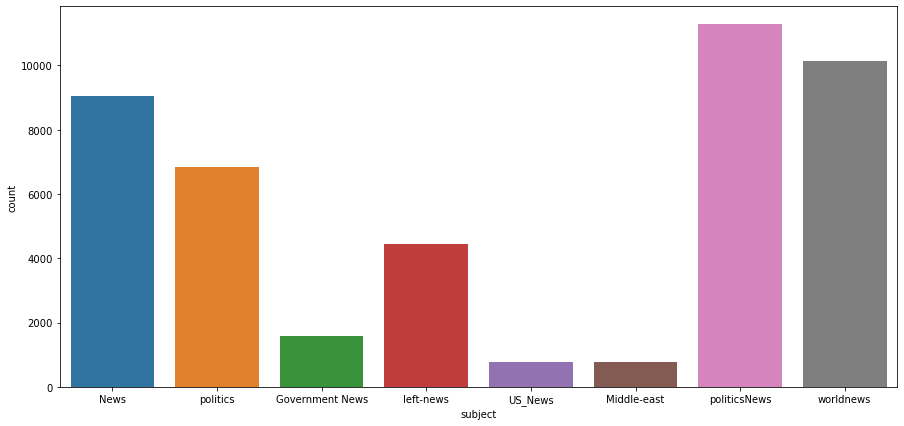

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(dataset['subject'])

<AxesSubplot:xlabel='subject', ylabel='count'>

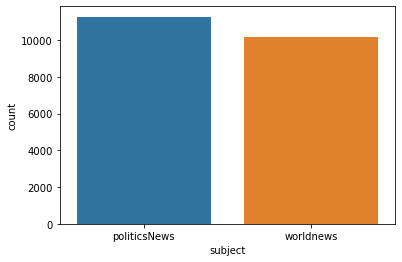

In [13]:
sns.countplot(true_data['subject'])

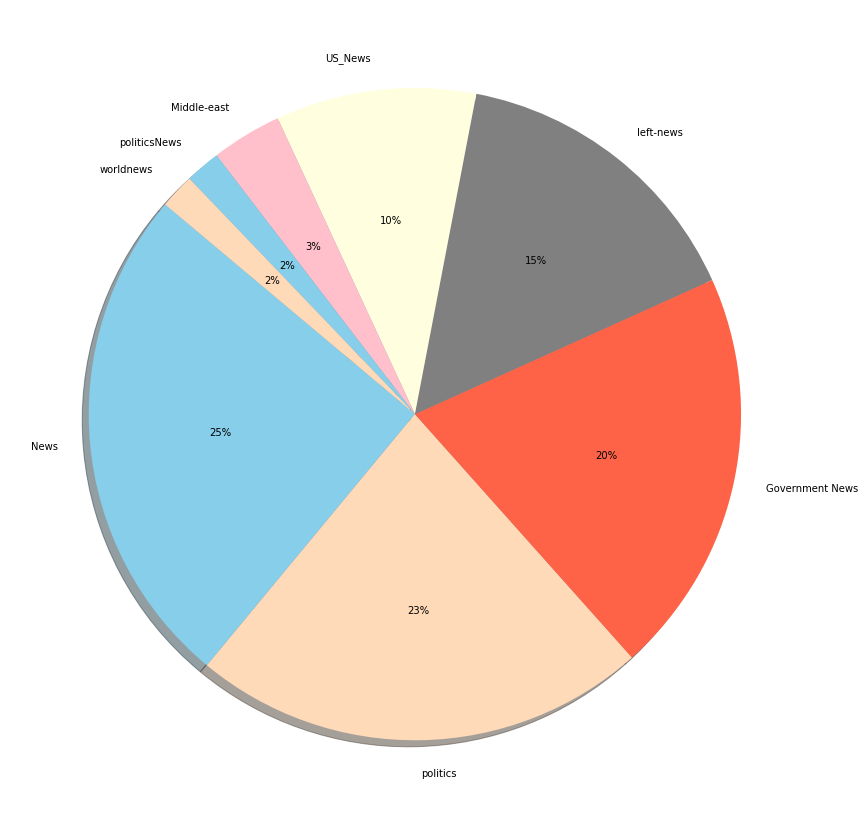

In [14]:
plt.figure(figsize=(15,15))
labels=['News','politics','Government News','left-news','US_News','Middle-east','politicsNews','worldnews']
colors = ["SkyBlue","PeachPuff",'tomato','gray','lightyellow','pink']
plt.pie(dataset['subject'].value_counts(),labels=labels,colors=colors,
        autopct='%1.f%%', shadow=True, startangle=140) 
plt.show()

# NLP Processing

In [15]:
dataset['all_combined'] = dataset['subject'] + " " + dataset['title'] + " " + dataset['text']

In [16]:
dataset['all_combined'].head()


0    News  Donald Trump Sends Out Embarrassing New ...
1    News  Drunk Bragging Trump Staffer Started Rus...
2    News  Sheriff David Clarke Becomes An Internet...
3    News  Trump Is So Obsessed He Even Has Obama’s...
4    News  Pope Francis Just Called Out Donald Trum...
Name: all_combined, dtype: object

## Data Cleaning

In [17]:
def clean(data):
    data = data.lower()
    data = re.sub('https?://\S+|www\.\S+', ' ', data)
    data = re.sub('\\W', ' ', data)
    data = re.sub('\n', ' ', data)
    data = re.sub(' +', ' ', data)
    data = re.sub('^ ', ' ', data)
    data = re.sub(' $', ' ', data)
    data = re.sub('[^a-zA-Z]',' ', data)
    return data

In [18]:
dataset['all_cleaned'] = dataset['all_combined'].apply(clean)

In [19]:
dataset[['all_combined', 'all_cleaned', 'label']].head()

all_combined  \
0  News  Donald Trump Sends Out Embarrassing New ...   
1  News  Drunk Bragging Trump Staffer Started Rus...   
2  News  Sheriff David Clarke Becomes An Internet...   
3  News  Trump Is So Obsessed He Even Has Obama’s...   
4  News  Pope Francis Just Called Out Donald Trum...   

                                         all_cleaned  label  
0  news donald trump sends out embarrassing new y...      0  
1  news drunk bragging trump staffer started russ...      0  
2  news sheriff david clarke becomes an internet ...      0  
3  news trump is so obsessed he even has obama s ...      0  
4  news pope francis just called out donald trump...      0

### Stopwords

In [20]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
stop = set(stopwords.words('english'))
def remove_stopwords(data):
    words = [word for word in data if word not in stop]
    words= "".join(words).split()
    words= [words.lower() for words in data.split()]
    return words   

In [22]:
dataset['all_cleaned'].apply(remove_stopwords)

0        [news, donald, trump, sends, out, embarrassing...
1        [news, drunk, bragging, trump, staffer, starte...
2        [news, sheriff, david, clarke, becomes, an, in...
3        [news, trump, is, so, obsessed, he, even, has,...
4        [news, pope, francis, just, called, out, donal...
                               ...                        
21412    [worldnews, fully, committed, nato, backs, new...
21413    [worldnews, lexisnexis, withdrew, two, product...
21414    [worldnews, minsk, cultural, hub, becomes, hav...
21415    [worldnews, vatican, upbeat, on, possibility, ...
21416    [worldnews, indonesia, to, buy, billion, worth...
Name: all_cleaned, Length: 44898, dtype: object

In [23]:
dataset[['all_combined', 'all_cleaned', 'label']].head()

all_combined  \
0  News  Donald Trump Sends Out Embarrassing New ...   
1  News  Drunk Bragging Trump Staffer Started Rus...   
2  News  Sheriff David Clarke Becomes An Internet...   
3  News  Trump Is So Obsessed He Even Has Obama’s...   
4  News  Pope Francis Just Called Out Donald Trum...   

                                         all_cleaned  label  
0  news donald trump sends out embarrassing new y...      0  
1  news drunk bragging trump staffer started russ...      0  
2  news sheriff david clarke becomes an internet ...      0  
3  news trump is so obsessed he even has obama s ...      0  
4  news pope francis just called out donald trump...      0

### Lemmatization

waches, watched --> watch (root form)

reducing a word to its root form 


however,
felt -> feel (root)


In [24]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("feared"))
print(lemmatizer.lemmatize("watches"))
print(lemmatizer.lemmatize("babies"))

feared
watch
baby


In [25]:
def lemmatization(data):
    lemmas = []
    for word in data.split():
        lemmas.append(lemmatizer.lemmatize(word))
    return " ".join(lemmas)

In [26]:
dataset['all_cleaned'].apply(lemmatization)

0        news donald trump sends out embarrassing new y...
1        news drunk bragging trump staffer started russ...
2        news sheriff david clarke becomes an internet ...
3        news trump is so obsessed he even ha obama s n...
4        news pope francis just called out donald trump...
                               ...                        
21412    worldnews fully committed nato back new u s ap...
21413    worldnews lexisnexis withdrew two product from...
21414    worldnews minsk cultural hub becomes haven fro...
21415    worldnews vatican upbeat on possibility of pop...
21416    worldnews indonesia to buy billion worth of ru...
Name: all_cleaned, Length: 44898, dtype: object

In [27]:
dataset[['all_combined', 'all_cleaned', 'label']].head()

all_combined  \
0  News  Donald Trump Sends Out Embarrassing New ...   
1  News  Drunk Bragging Trump Staffer Started Rus...   
2  News  Sheriff David Clarke Becomes An Internet...   
3  News  Trump Is So Obsessed He Even Has Obama’s...   
4  News  Pope Francis Just Called Out Donald Trum...   

                                         all_cleaned  label  
0  news donald trump sends out embarrassing new y...      0  
1  news drunk bragging trump staffer started russ...      0  
2  news sheriff david clarke becomes an internet ...      0  
3  news trump is so obsessed he even has obama s ...      0  
4  news pope francis just called out donald trump...      0

### Tokenization

In [28]:
dataset['all_cleaned'].values

array(['news donald trump sends out embarrassing new year s eve message this is disturbing donald trump just couldn t wish all americans a happy new year and leave it at that instead he had to give a shout out to his enemies haters and the very dishonest fake news media the former reality show star had just one job to do and he couldn t do it as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year president angry pants tweeted      will be a great year for america as our country rapidly grows stronger and smarter i want to wish all of my friends supporters enemies haters and even the very dishonest fake news media a happy and healthy new year      will be a great year for america donald j trump realdonaldtrump december        trump s tweet went down about as welll as you d expect what kind of president sends a new year s greeting like this despicable petty infan

In [29]:
x = dataset['all_cleaned'].values
y = dataset['label'].values

In [30]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [31]:
word_to_index = tokenizer.word_index
word_to_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 's': 7,
 'that': 8,
 'on': 9,
 'for': 10,
 'is': 11,
 'trump': 12,
 'he': 13,
 'it': 14,
 'said': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'not': 23,
 'have': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'they': 30,
 'an': 31,
 'i': 32,
 'we': 33,
 'but': 34,
 'u': 35,
 'president': 36,
 'would': 37,
 't': 38,
 'about': 39,
 'will': 40,
 'you': 41,
 'their': 42,
 'had': 43,
 'been': 44,
 'people': 45,
 'more': 46,
 'were': 47,
 'or': 48,
 'after': 49,
 'she': 50,
 'one': 51,
 'which': 52,
 'news': 53,
 'her': 54,
 'if': 55,
 'out': 56,
 'all': 57,
 'state': 58,
 'what': 59,
 'when': 60,
 'new': 61,
 'up': 62,
 'there': 63,
 'obama': 64,
 'also': 65,
 'its': 66,
 'no': 67,
 'clinton': 68,
 'over': 69,
 'government': 70,
 'house': 71,
 'reuters': 72,
 'donald': 73,
 'so': 74,
 'can': 75,
 'our': 76,
 'states': 77,
 'him': 78,
 'republican': 79,
 'just': 80,
 't

In [32]:
x = tokenizer.texts_to_sequences(x)

In [33]:
x

[[53,
  73,
  12,
  4891,
  56,
  2713,
  61,
  82,
  7,
  4488,
  642,
  26,
  11,
  2794,
  73,
  12,
  80,
  1369,
  38,
  2463,
  57,
  221,
  4,
  1631,
  61,
  82,
  5,
  662,
  14,
  27,
  8,
  537,
  13,
  43,
  2,
  414,
  4,
  7741,
  56,
  2,
  19,
  3153,
  8187,
  5,
  1,
  154,
  4740,
  619,
  53,
  119,
  1,
  109,
  957,
  242,
  986,
  43,
  80,
  51,
  454,
  2,
  92,
  5,
  13,
  1369,
  38,
  92,
  14,
  18,
  76,
  111,
  4644,
  9467,
  2879,
  5,
  10521,
  32,
  190,
  2,
  2463,
  57,
  3,
  181,
  960,
  336,
  3153,
  8187,
  5,
  112,
  1,
  154,
  4740,
  619,
  53,
  119,
  4,
  1631,
  5,
  4206,
  61,
  82,
  36,
  1565,
  6007,
  1029,
  40,
  22,
  4,
  364,
  82,
  10,
  148,
  18,
  76,
  111,
  4644,
  9467,
  2879,
  5,
  10521,
  32,
  190,
  2,
  2463,
  57,
  3,
  181,
  960,
  336,
  3153,
  8187,
  5,
  112,
  1,
  154,
  4740,
  619,
  53,
  119,
  4,
  1631,
  5,
  4206,
  61,
  82,
  40,
  22,
  4,
  364,
  82,
  10,
  148,
  73,
  735,
  

In [34]:
vocab_size = len(word_to_index)+1
vocab_size

111945

### Padding after Tokenization

In [35]:
from keras.preprocessing.sequence import pad_sequences

In [36]:
max_length = 10000
embedding_dim = 16
x = pad_sequences(x, maxlen=max_length)

In [37]:
x

array([[    0,     0,     0, ..., 10475,   566,   493],
       [    0,     0,     0, ...,  5505,   566,   493],
       [    0,     0,     0, ...,  7544,   566,   493],
       ...,
       [    0,     0,     0, ...,   162,    13,    15],
       [    0,     0,     0, ...,   690,    16,  6614],
       [    0,     0,     0, ...,  5769,   344,   479]], dtype=int32)

# ML Model and Evaluation

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [48]:
from keras import layers
from  keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from keras import callbacks

In [49]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=10, 
                           input_length=X_train.shape[1]))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss=BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10000, 10)         1119450   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,119,547
Trainable params: 1,119,547
Non-trainable params: 0
_________________________________________________________________


In [50]:
callback = callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1123/1123 [==============================] - 23s 20ms/step - loss: 0.6812 - accuracy: 0.5581 - val_loss: 0.4689 - val_accuracy: 0.9290
Epoch 2/10
1123/1123 [==============================] - 23s 20ms/step - loss: 0.3635 - accuracy: 0.9271 - val_loss: 0.1984 - val_accuracy: 0.9527
Epoch 3/10
1123/1123 [==============================] - 22s 20ms/step - loss: 0.1698 - accuracy: 0.9638 - val_loss: 0.1306 - val_accuracy: 0.9732
Epoch 4/10
1123/1123 [==============================] - 22s 19ms/step - loss: 0.1122 - accuracy: 0.9772 - val_loss: 0.0971 - val_accuracy: 0.9807
Epoch 5/10
1123/1123 [==============================] - 22s 20ms/step - loss: 0.0851 - accuracy: 0.9839 - val_loss: 0.0825 - val_accuracy: 0.9823
Epoch 6/10
1123/1123 [==============================] - 22s 20ms/step - loss: 0.0613 - accuracy: 0.9875 - val_loss: 0.0610 - val_accuracy: 0.9873
Epoch 7/10
1123/1123 [==============================] - 22s 20ms/step - loss: 0.0478 - accuracy: 0.9914 - val_loss: 0.0512 -

### Accuracy

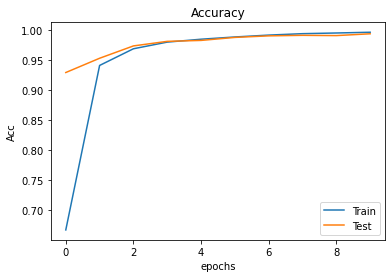

In [51]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

### Loss

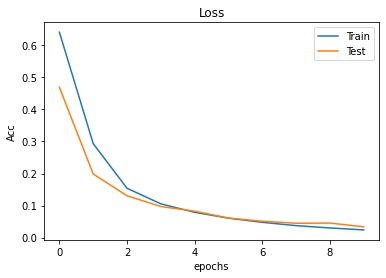

In [52]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [53]:
prediction = model.predict(X_test)

In [65]:
prediction

array([[1.1326075e-03],
       [9.9988163e-01],
       [9.9839592e-01],
       ...,
       [6.2258016e-07],
       [1.7273635e-02],
       [2.3167998e-02]], dtype=float32)

In [67]:
prediction = prediction.ravel()

In [69]:
prediction

array([1.1326075e-03, 9.9988163e-01, 9.9839592e-01, ..., 6.2258016e-07,
       1.7273635e-02, 2.3167998e-02], dtype=float32)

In [68]:
df = pd.DataFrame({'Actual': Y_test, 'Predict': prediction.round()})
print(df)

      Actual  Predict
0          0      0.0
1          1      1.0
2          1      1.0
3          0      0.0
4          1      1.0
...      ...      ...
8975       1      1.0
8976       0      0.0
8977       0      0.0
8978       0      0.0
8979       0      0.0

[8980 rows x 2 columns]
